In [9]:
import os
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Télécharger les ressources nécessaires
nltk.download('punkt')
nltk.download('stopwords')

# Définir le chemin absolu
data_path = r"/Users/walazerelli/Desktop/Traitement corpus /tac/data/camille_La_Guerre_de_Coree"


# Charger les fichiers
articles = []
for file_name in os.listdir(data_path):
    if file_name.endswith(".txt"):
        with open(os.path.join(data_path, file_name), 'r', encoding='utf-8') as file:
            articles.append(file.read())

# Créer un DataFrame
data = pd.DataFrame({'content': articles})
print(f"Nombre d'articles chargés : {len(data)}")

# Nettoyage des textes
stop_words = set(stopwords.words('french'))

def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Supprimer les caractères spéciaux
    text = text.lower()  # Minuscule
    tokens = word_tokenize(text)  # Tokeniser
    tokens = [word for word in tokens if word not in stop_words]  # Stopwords
    return ' '.join(tokens)

# Appliquer le nettoyage
data['cleaned_text'] = data['content'].apply(clean_text)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/walazerelli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/walazerelli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Nombre d'articles chargés : 1001


In [10]:
 from collections import Counter

# Compter les mots fréquents
all_words = ' '.join(data['cleaned_text']).split()
word_freq = Counter(all_words)

# Les 10 mots les plus fréquents
print("Mots les plus fréquents :", word_freq.most_common(10))


Mots les plus fréquents : [('a', 80666), ('plus', 17277), ('corée', 17045), ('p', 14042), ('cette', 13211), ('1', 12193), ('i', 11455), ('guerre', 11164), ('u', 10150), ('gouvernement', 10144)]


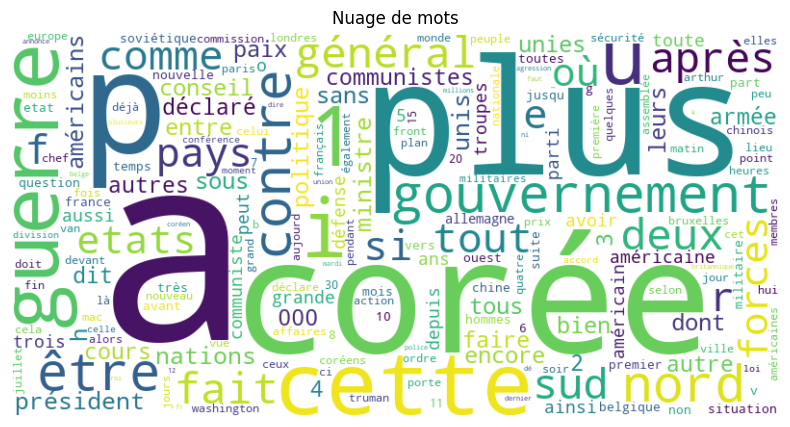

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Générer le nuage de mots
cloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots")
plt.show()


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(data['cleaned_text'])

# Clustering KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
data['cluster'] = kmeans.fit_predict(X)

# Afficher les clusters
print(data[['content', 'cluster']].head())


                                             content  cluster
0  am née - N 5 177 Annonc** _Don. Vent. Divers I...        2
1  56* ANNEE — N° 293 • '« fOÜHNAL QUOTIDIEN , , ...        2
2  I AIL S •ot. ». it brû- cours I Tho- i a dû (S...        1
3  Vendredi 18 août 1950 ^iiMïraaïîœ La séance de...        1
4  T ■ j^udl gg Octobre 1960. 'JOURNAL DE CHARLER...        2


In [1]:
import spacy
import pandas as pd
import os

# Charger le modèle SpaCy pour le français
nlp = spacy.load("fr_core_news_sm")

# Chemin vers vos données
data_path = "/Users/walazerelli/Desktop/Traitement corpus /tac/data/camille_La_Guerre_de_Coree"

# Lire les fichiers texte ans un DataFrame
articles = []
for file_name in os.listdir(data_path):
    if file_name.endswith(".txt"):
        with open(os.path.join(data_path, file_name), "r", encoding="utf-8") as file:
            articles.append(file.read())

# Créer un DataFrame avec vos articles
data = pd.DataFrame({"cleaned_text": articles})
print(f"Nombre d'articles chargés : {len(data)}")

# Fonction pour extraire les entités nommées
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Appliquer la fonction d'extraction des entités
data["entities"] = data["cleaned_text"].apply(extract_entities)

# Afficher les entités extraites
print(data.head())



Nombre d'articles chargés : 1001
                                        cleaned_text  \
0  am née - N 5 177 Annonc** _Don. Vent. Divers I...   
1  56* ANNEE — N° 293 • '« fOÜHNAL QUOTIDIEN , , ...   
2  I AIL S •ot. ». it brû- cours I Tho- i a dû (S...   
3  Vendredi 18 août 1950 ^iiMïraaïîœ La séance de...   
4  T ■ j^udl gg Octobre 1960. 'JOURNAL DE CHARLER...   

                                            entities  
0  [(N 5 177 Annonc, MISC), (Don, LOC), (I •, MIS...  
1  [(ANNEE, MISC), (fOÜHNAL QUOTIDIEN, ORG), (Pag...  
2  [(I, LOC), (it, MISC), (I, LOC), (S, LOC), (Jb...  
3  [(Vendredi, LOC), (^iiMïraaïîœ, LOC), (Chambre...  
4  [(j^udl gg Octobre, PER), (JOURNAL, MISC), (CH...  


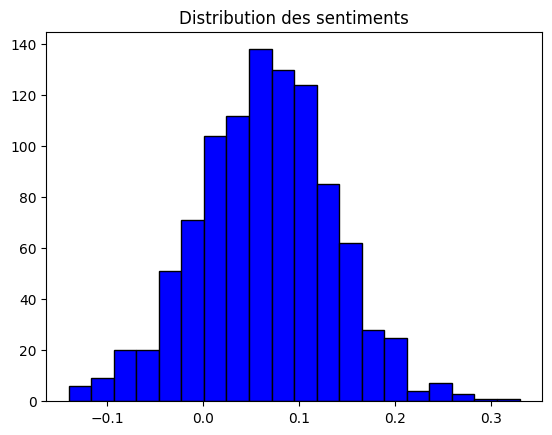

In [13]:
from textblob import TextBlob

def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Appliquer l'analyse des sentiments
data['sentiment'] = data['cleaned_text'].apply(analyze_sentiment)

# Distribution des sentiments
plt.hist(data['sentiment'], bins=20, color='blue', edgecolor='black')
plt.title("Distribution des sentiments")
plt.show()


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(data['cleaned_text'])

# Clustering KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
data['cluster'] = kmeans.fit_predict(X)

# Afficher les clusters
print(data[['content', 'cluster']].head())



                                             content  cluster
0  am née - N 5 177 Annonc** _Don. Vent. Divers I...        2
1  56* ANNEE — N° 293 • '« fOÜHNAL QUOTIDIEN , , ...        2
2  I AIL S •ot. ». it brû- cours I Tho- i a dû (S...        1
3  Vendredi 18 août 1950 ^iiMïraaïîœ La séance de...        1
4  T ■ j^udl gg Octobre 1960. 'JOURNAL DE CHARLER...        2


In [22]:
# Calculer la répartition des clusters
cluster_counts = data['cluster'].value_counts()
print(cluster_counts)



cluster
0    474
2    303
1    224
Name: count, dtype: int64


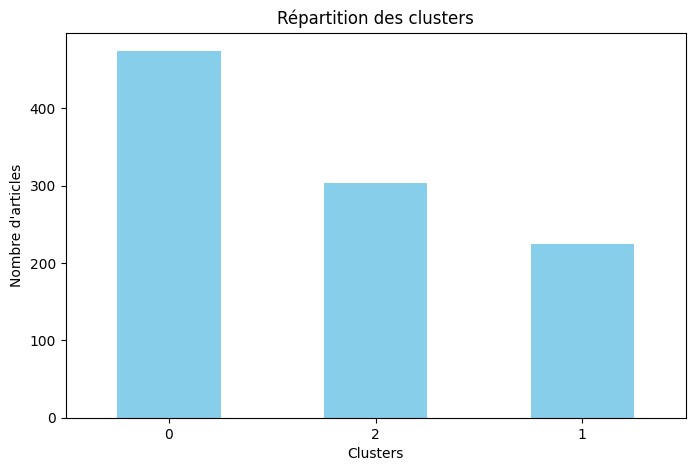

In [24]:
# Créer un histogramme
plt.figure(figsize=(8, 5))
cluster_counts.plot.bar(color='skyblue')
plt.title('Répartition des clusters')
plt.xlabel('Clusters')
plt.ylabel('Nombre d\'articles')
plt.xticks(rotation=0)
plt.show()




In [19]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Exemple de texte
documents = [
    "La Guerre de Corée a eu lieu de 1950 à 1953.",
    "Le président Syngman Rhee était au pouvoir.",
    "Le conflit impliquait les États-Unis et l'Union soviétique.",
    "C'était une guerre intense avec des implications mondiales."
]

# Tokeniser les textes pour Word2Vec
tokenized_texts = [word_tokenize(doc) for doc in documents]

# Entraîner le modèle Word2Vec
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Exemple de mots similaires à un mot clé (par exemple "guerre")
print("Mots similaires à 'guerre' :")
print(w2v_model.wv.most_similar('guerre'))


Mots similaires à 'guerre' :
[('Corée', 0.3040170669555664), ('.', 0.1956348568201065), ('conflit', 0.18896186351776123), ("C'était", 0.16687247157096863), ('au', 0.14208613336086273), ('lieu', 0.12638112902641296), ('avec', 0.11594416946172714), ('une', 0.06338422745466232), ('les', 0.05133480206131935), ('a', 0.04641122370958328)]


In [20]:
from gensim.models import Word2Vec

# Préparer les phrases pour Word2Vec
sentences = [text.split() for text in data['cleaned_text']]

# Former le modèle Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

# Trouver des mots similaires
print(model.wv.most_similar("guerre", topn=10))


[('guer', 0.6647118330001831), ('auerre', 0.5815549492835999), ('agression', 0.5678824782371521), ('conflagration', 0.5678316354751587), ('hostilités', 0.5663373470306396), ('ruerre', 0.5645345449447632), ('domination', 0.546198844909668), ('campagne', 0.5407254099845886), ('uerre', 0.5405228137969971), ('guerro', 0.5355047583580017)]
